# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [90]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


# Create two new dataframes

df_north = pd.read_csv("NorthCallCenter.csv")


df_north



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [4]:
df_south = pd.read_csv("SouthCallCenter.csv")
df_south

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [9]:
#1)NORTH- How many reps are in each branch?

df_north.value_counts("Rep ID").sum()


245

In [8]:
#1)SOUTH- How many reps are in each branch?

df_south.value_counts("Rep ID").sum()

314

In [22]:
#2)What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
#NORTH busy minutes: 9.987755, not ready minutes: 1.914286, incoming wait time: 3.048780, during call wait time: 2.967347

df_north.describe()


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [25]:
#2)What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
#SOUTH busy minutes: 10.05414, not ready minutes: 1.910828, incoming wait time: 3.000000, during call wait time: 3.076433

df_south.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [26]:
#3)What is the number of calls taken for each time block?

df_north.value_counts("Time Block")



Time Block
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
dtype: int64

In [29]:
#3)What is the number of calls taken for each time block?

df_south.value_counts("Time Block")

Time Block
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [108]:
#1) #How many reps? North - 245 / South - 314
#2) #Average per branch:
    #Busy Minutes North - 9.99 / South - 10.05
    #Not Ready Minutes North - 1.91 / South - 1.91
    #Incoming Wait Time North - 3.05 / South - 3.00
    #During Call Wait Time North - 2.97 / South 3.08
    
#3) #Number of calls for each time block:

                #North   #South

   #9:00a        5   /    5
   #10:00a      43   /   56
   #11:00a      25   /   31
   #12:00p      45   /   75
   #1:00p       17   /   23
   #2:00p       35   /   30
   #3:00p       30   /   43
   #4:00p       28   /   25
   #5:00p       17   /   26
    

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [95]:
# Clean your data here

#1)Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

df_north.isnull().sum()
#Incoming Wait Time 163

wt = df_north.groupby('Incoming or Outgoing')
wt.first()

#yes, 82


,Unnamed: 0,Branch,Call Purpose,Time Block,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,,,,,,,
Incoming,0,North,Complaint,9:00 AM,B,Brent,NO,0,1,9,2,1.0,4,1
Outgoing,82,North,Sales Support,10:00 AM,A,Cam,NO,1,0,8,1,NaN,2,1


In [96]:
#1)Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

df_south.isnull().sum()
#Incoming Wait Time 188

wt = df_south.groupby('Incoming or Outgoing')
wt.first()

#yes, 126

#OK 1 - code to remove null values for incoming wait times on outgoing calls 


,Unnamed: 0,Branch,Call Purpose,Time Block,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Incoming or Outgoing,,,,,,,,,,,,,,
Incoming,0,South,Sales Support,10:00 AM,D,Kate,NO,0,0,9,1,1.0,2,1
Outgoing,126,South,Product Support,9:00 AM,C,Sandy,NO,1,0,12,2,NaN,4,1


In [37]:
#2)In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

df_north = pd.read_csv("NorthCallCenter.csv")

df_north.loc[:,"Sale"]


0      NO
1      NO
2      NO
3      NO
4      NO
       ..
240    NO
241    NO
242    NO
243    NO
244    NO
Name: Sale, Length: 245, dtype: object

In [38]:
#2) This is how I rectified the issue.
df_north["Sale"].replace({"NO":"FALSE","YES":"TRUE"}, inplace=True)
df_north

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,FALSE,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,FALSE,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,FALSE,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,FALSE,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,FALSE,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,FALSE,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,FALSE,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,FALSE,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,FALSE,0,0,11,2,NaN,2,1


In [40]:
#3)Are there duplicates in the two data sets? If there are, how did you handle them?

#Yes, "Calls"

df_north.drop("Calls", axis=1)

df_north


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,FALSE,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,FALSE,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,FALSE,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,FALSE,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,FALSE,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,FALSE,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,FALSE,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,FALSE,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,FALSE,0,0,11,2,NaN,2,1


In [41]:
#3)Are there duplicates in the two data sets? If there are, how did you handle them?

df_south.drop("Calls", axis=1)

df_south

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [66]:
#4) Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

#These columns were not measured, above.

df_north.drop(['Lost Call','Abandoned'],axis=1)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,FALSE,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,FALSE,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,FALSE,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,FALSE,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,FALSE,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,FALSE,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,FALSE,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,FALSE,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,FALSE,11,2,NaN,2,1


In [67]:
#4) Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

#These columns were not measured, above.

df_south.drop(['Lost Call','Abandoned'],axis=1)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,10,1,NaN,2,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [185]:
#1) North - 82 null are outgoing calls / South - 126 null are outgoing calls

#2) Values should be kept in the Sale column. I replaced values with true and false.

#3) Yes, I dropped the "calls" column in both datasets.

#4)Yes, the lost call and abandoned columns were not measured in the top part of the exercise.


## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [69]:
#combine two datasets to create a third datafram called df

df=df_north.append(df_south)


In [71]:
#1) Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

df.groupby(["Rep ID","Branch"]).sum().sort_values("Calls",ascending=False)


,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Brent,North,4840,0,1,362,71,17.0,117,37
Eric,South,5039,0,0,361,54,47.0,112,35
Randy,South,4576,3,1,320,66,47.0,98,33
Sandy,South,4694,1,0,325,60,34.0,100,32
Helga,South,5236,0,2,292,58,36.0,95,31
Lilly,North,3375,0,2,307,59,37.0,88,30
Todd,North,4252,1,0,296,58,21.0,97,29
Duke,North,2999,2,0,292,56,39.0,85,29
George,South,4620,0,0,298,53,41.0,87,29


In [97]:
#2)The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?


abd_north = df_north["Abandoned"].sum()/df_north["Calls"].sum()*100

abd_north

#2.86 Within range

2.857142857142857

In [98]:
#2)The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

abd_south = df_south["Abandoned"].sum()/df_south["Calls"].sum()*100

abd_south

#1.27 out of range

1.2738853503184715

In [99]:
#2)The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls wher

abd_all = df["Abandoned"].sum()/df["Calls"].sum()*100

abd_all

#1.97 out of range

1.9677996422182469

In [126]:
#3)Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

service_level =  (df_north["Incoming Wait Time"] <= 2.0).sum()*100
service_level.sum()/100



33.0

In [128]:
#3)Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

service_level =  (df_south["Incoming Wait Time"] <= 2.0).sum()*100
service_level.sum()/100

48.0

In [129]:
#3)Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

service_level =  (df["Incoming Wait Time"] <= 2.0).sum()*100
service_level.sum()/100

81.0

In [86]:
#4)For each branch and the entire company, what is the average speed of answer?
speedN = df_north['Incoming Wait Time']/df_north['Calls']
speedN.mean()

#3.05


3.048780487804878

In [87]:
#4)For each branch and the entire company, what is the average speed of answer?

speedS = df_south['Incoming Wait Time']/df_south['Calls']
speedS.mean()

#3.0 FASTEST SPEED

3.0

In [88]:
#4)For each branch and the entire company, what is the average speed of answer?

speedA = df['Incoming Wait Time']/df['Calls']
speedA.mean()

#3.02

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [ ]:
#1) Brent has the highest number of calls in the north branch with 37. Eric has the highest number of calls in the south branch with 35.
#2) 2.86 North Within range/1.27 South out of range/1.97 Whole company out of range
#3) North: 33% / South: 48% / Combined: 81% of calls are answered in less than 2 seconds.
#4) North:3.05/South:3.00/Combined: 3.02 The south branch has the fastest speed.

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,,
A,11084,1,4,946,181,116.0,272,96
B,18806,4,3,1501,288,134.0,455,149
C,21602,4,1,1409,251,160.0,435,138
D,27539,7,3,1748,349,218.0,531,176


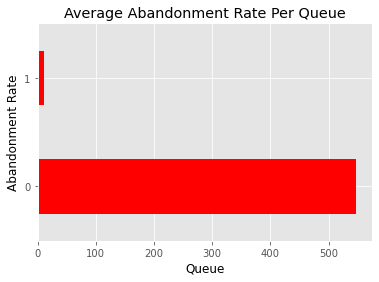

In [112]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

style.use('ggplot')
abandonment_rates = {}

fig1=df["Abandoned"].value_counts();
plt.figure();fig1.plot.barh(title='Average Abandonment Rate Per Queue',color='red');
plt.xlabel('Queue',color='black')
plt.ylabel('Abandonment Rate',color='black')


abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
    
queue_dict
    
#I used a bar chart to compare values.
    

In [113]:
#1)

abandonment_rates
#A is the highest and C is the lowest.

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

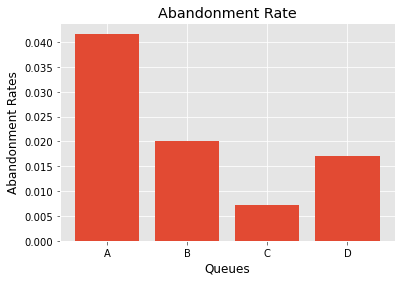

In [114]:
x = list(abandonment_rates.keys())
y = list(abandonment_rates.values())
plt.bar(x,y)
plt.title('Abandonment Rate' , color = 'black')
plt.xticks(color = 'black')
plt.yticks(color ='black')
plt.xlabel('Queues',color='black')
plt.ylabel('Abandonment Rates',color='black')
plt.show()

In [115]:
#2)
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_north[df_north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

quick_stats


,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


In [116]:

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_north[df_north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

total_stats

,Calls
Rep ID,
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Joe,10
Lilly,12
Todd,6
Xander,6


In [117]:

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level


,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [118]:

x = list('Rep ID')['Amanda', 'Andy', 'Brent', 'Cam', 'Duke', 'Joe', 'Lilly', 'Todd', 'Xander']
y1 = list('service_level')[10, 20, 30, 40, 50, 60, 70, 80]
y2 = list('quick_stats')[1, 2, 3, 4, 5, 6, 7]
  

plt.bar(x, y1, color='red')
plt.bar(x, y2, bottom=y1, color='blue')
plt.xlabel('Rep ID',color='black')
plt.y1label('service_level',color='black')
plt.y2label('quick_stats', color='black')
plt.show()


TypeError: list indices must be integers or slices, not tuple

In [120]:
#3)

purpose_group = df.groupby("Call Purpose")

call_purpose = ["Complaint", "Product Support", "Sales Support"]

call_purpose  

['Complaint', 'Product Support', 'Sales Support']

In [122]:

# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()



AttributeError: module 'matplotlib.pyplot' has no attribute 'y1abel'

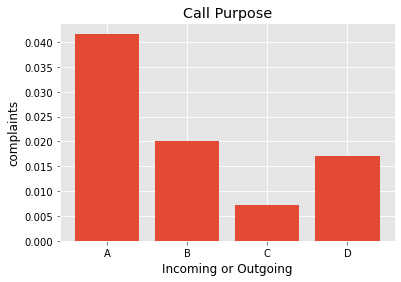

In [123]:
plt.bar(x,y)
plt.title('Call Purpose', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color ='black')
plt.xlabel('Incoming or Outgoing',color='black')
plt.ylabel('Type', color ='black')
plt.ylabel('complaints',color='black')
plt.y1abel('sales_support',color='blue')


plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

In [124]:
#1) A bar chart works for abandonment rates per queue because you are comparing values across 4 queues.
#2) A bar chart works for comparing the values of service levels and average speed per rep. 
#3) A bar chart will show the type of call purpose based on volume of incoming or outgoing calls.


## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [ ]:
#1) The North branch had the top performer who took more calls and overall this branch had a better call abandonment rate. The South branch statistics, however are so much stronger. They have more reps, take more calls in the most time blocks, have the highest service level percentage and the overall fastest speed.  
#2) The South branch has more reps than the North branch. The South branch also has a faster spped, therefore the North branch could use some extra help.
#3) Yes, it is not clear what the timeframe is (day/week/year). Were there any outlying factors or variables that could have had an effect on the data such as power outages? How long have the reps been employed at the company? Could it be that new hires need more training? How long has each rep been with the company?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [125]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
